In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress


In [4]:
def draw_plot():
    # Read data from file
    df=pd.read_csv('data_files/epa-sea-level.csv')
    # Use matplotlib to create a scatter plot using the "Year" column as the x-axis and 
    #the "CSIRO Adjusted Sea Level" column as the y-axix.
    # with 2 lines of the bset fit: over all data and after year 2000
    
    # Create first line of best fit
    #Use the linregress function from scipy.stats to get the slope and y-intercept of the line of best fit. 
    #Plot the line of best fit over the top of the scatter plot. 
    #Make the line go through the year 2050 to predict the sea level rise in 2050.
    slope, intercept, r_value, p_value, std_err =linregress(x=df['Year'], y=df['CSIRO Adjusted Sea Level'])
        
    df1=df.filter(['Year'], axis=1)
    df1=df1.append({'Year':2050}, ignore_index=True)
    
    fit = slope*df1['Year'] + intercept
    
    # Create second line of best fit
    #Plot a new line of best fit just using the data from year 2000 through the most recent year in the dataset. 
    #Make the line also go through the year 2050 to predict the sea level rise in 2050 
    #if the rate of rise continues as it has since the year 2000.
    df2=df[df['Year']>=2000].filter(['Year','CSIRO Adjusted Sea Level'], axis=1)
    slope2, intercept2, r_value, p_value, std_err =linregress(x=df2['Year'], y=df2['CSIRO Adjusted Sea Level'])
    
    fitline2=df2.filter(['Year'])
    fitline2= fitline2.append({'Year':2050}, ignore_index=True)
    fit2= slope2*fitline2['Year'] + intercept2
    
    #PLOT
    fig = plt.figure(figsize=(14, 6))
    plt.scatter(x='Year', y='CSIRO Adjusted Sea Level', data=df)
    plt.plot(df1['Year'], fit , label='Fitted Line 1880 to 2050', color='b')
    plt.plot(fitline2['Year'], fit2 , label='Fitted Line 2000 to 2050', color='r')
    plt.xlim([1880, 2060])
    plt.title('Rise in Sea Level', fontdict = {'fontsize' : 30})
    plt.xlabel('Year')
    plt.ylabel('Sea Level (inches)')
    plt.legend()
        
    # Save plot and return data for testing (DO NOT MODIFY)
    plt.savefig('images/sea_level_plot.png')
    plt.show()
    return plt.gca()

/tmp/ipykernel_15135/328262689.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df1=df1.append({'Year':2050}, ignore_index=True)
/tmp/ipykernel_15135/328262689.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  fitline2= fitline2.append({'Year':2050}, ignore_index=True)


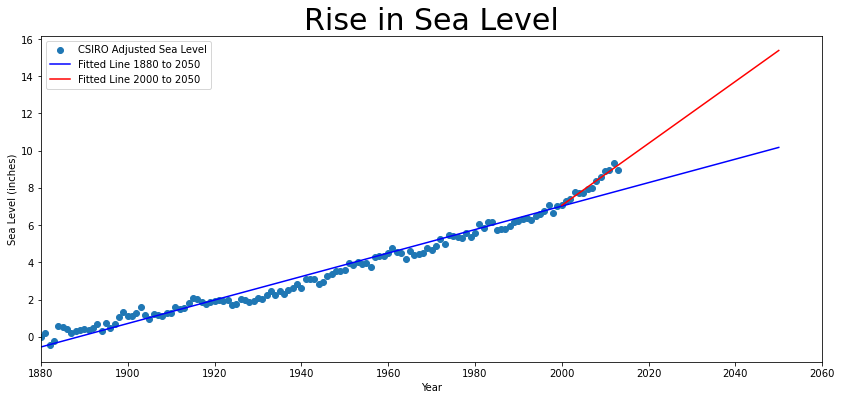

<AxesSubplot:>

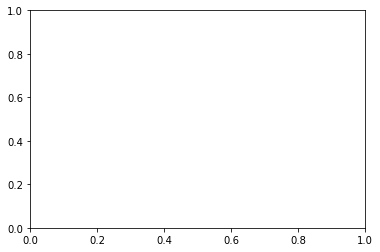

In [5]:
draw_plot()